In [12]:
#this program uses the dual moving average crossover to determine when to buy and sell
#If the moving average of 30 days is greater than the moving average of 100 days, then we start buying
#and viceversa
    


In [13]:
#import the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [14]:
#store the data from csv
SAAPL = pd.read_csv('D:\DS\Data\movingaverage.csv')




In [15]:
SAAPL

,Date,Open,High,Low,Close,Volume,AdjClose
0,10/14/2008,116.26,116.40,103.14,104.08,70749800,104.08
1,10/13/2008,104.55,110.53,101.02,110.26,54967000,110.26
2,10/10/2008,85.70,100.00,85.00,96.80,79260700,96.80
3,10/9/2008,93.35,95.80,86.60,88.74,57763700,88.74
4,10/8/2008,85.91,96.33,85.68,89.79,78847900,89.79
...,...,...,...,...,...,...,...
6076,9/13/1984,27.50,27.62,27.50,27.50,7429600,3.14
6077,9/12/1984,26.87,27.00,26.12,26.12,4773600,2.98
6078,9/11/1984,26.62,27.37,26.62,26.87,5444000,3.07
6079,9/10/1984,26.50,26.62,25.87,26.37,2346400,3.01


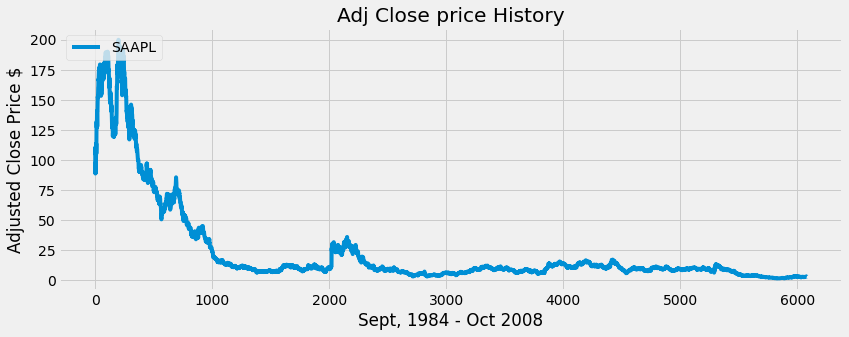

In [16]:
plt.figure(figsize= (12.5, 4.5))
plt.plot(SAAPL['AdjClose'], label = 'SAAPL')
plt.title('Adj Close price History')
plt.xlabel('Sept, 1984 - Oct 2008')
plt.ylabel('Adjusted Close Price $')
plt.legend(loc='upper left')
plt.show()

In [17]:
#Create the moving average with a 30 day window

DF30 = pd.DataFrame()

DF30['SMA30'] = SAAPL['AdjClose'].rolling(window=30).mean()

DF30





,SMA30
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6076,2.921667
6077,2.921000
6078,2.924333
6079,2.928333


In [18]:
#Create the moving average with a 100 day window

DF100 =pd.DataFrame()
DF100['SMA100'] = SAAPL['AdjClose'].rolling(window=100).mean()

DF100

,SMA100
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6076,3.0145
6077,3.0109
6078,3.0089
6079,3.0059


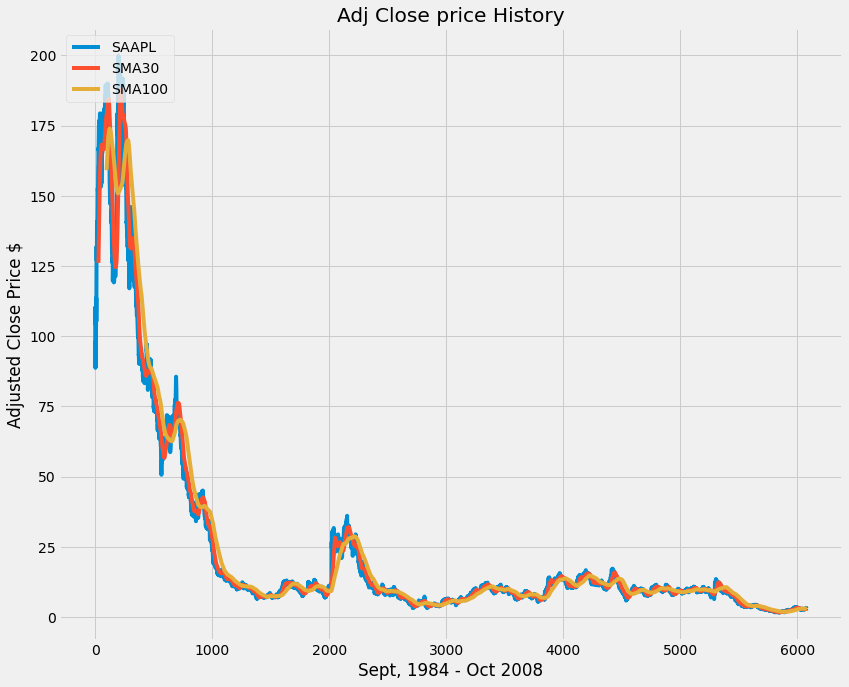

In [19]:
#Visualize the data

plt.figure(figsize= (12.5, 10.5))
plt.plot(SAAPL['AdjClose'], label = 'SAAPL')
plt.plot(DF30['SMA30'], label = 'SMA30')
plt.plot(DF100['SMA100'], label = 'SMA100')
plt.title('Adj Close price History')
plt.xlabel('Sept, 1984 - Oct 2008')
plt.ylabel('Adjusted Close Price $')
plt.legend(loc='upper left')
plt.show()


In [20]:
#create a new data frame to store all the data

df= pd.DataFrame()
df['ADJPR'] = SAAPL['AdjClose']
df['SMA30'] = DF30['SMA30']
df['SMA100'] = DF100['SMA100']




df

,ADJPR,SMA30,SMA100
0,104.08,NaN,NaN
1,110.26,NaN,NaN
2,96.80,NaN,NaN
3,88.74,NaN,NaN
4,89.79,NaN,NaN
...,...,...,...
6076,3.14,2.921667,3.0145
6077,2.98,2.921000,3.0109
6078,3.07,2.924333,3.0089
6079,3.01,2.928333,3.0059


In [21]:
#create a function to signal when to buy and sell
def buy_sell(df):
 sigPriceBuy = []
 sigPriceSell = [] 

 flag = -1

 for i in range(len(df)):

  
    
    if df['SMA30'][i] > df['SMA100'][i]:
      if flag != 1:
          sigPriceBuy.append(df['ADJPR'][i])
          sigPriceSell.append(np.nan)
        
          flag = 1
          
      else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
      
    elif df['SMA30'][i] < df['SMA100'][i]:
      
      if flag != 0:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(df['ADJPR'][i])
          flag = 0
          
      else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)

    else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
 
 return (sigPriceBuy, sigPriceSell)





            

In [22]:
#store the buy sell data into variable


buy_sell = buy_sell(df)
 
df['Buy_Price'] = buy_sell[0]
df['Sell_Price'] = buy_sell[1]




In [23]:
df

,ADJPR,SMA30,SMA100,Buy_Price,Sell_Price
0,104.08,NaN,NaN,NaN,NaN
1,110.26,NaN,NaN,NaN,NaN
2,96.80,NaN,NaN,NaN,NaN
3,88.74,NaN,NaN,NaN,NaN
4,89.79,NaN,NaN,NaN,NaN
...,...,...,...,...,...
6076,3.14,2.921667,3.0145,NaN,NaN
6077,2.98,2.921000,3.0109,NaN,NaN
6078,3.07,2.924333,3.0089,NaN,NaN
6079,3.01,2.928333,3.0059,NaN,NaN


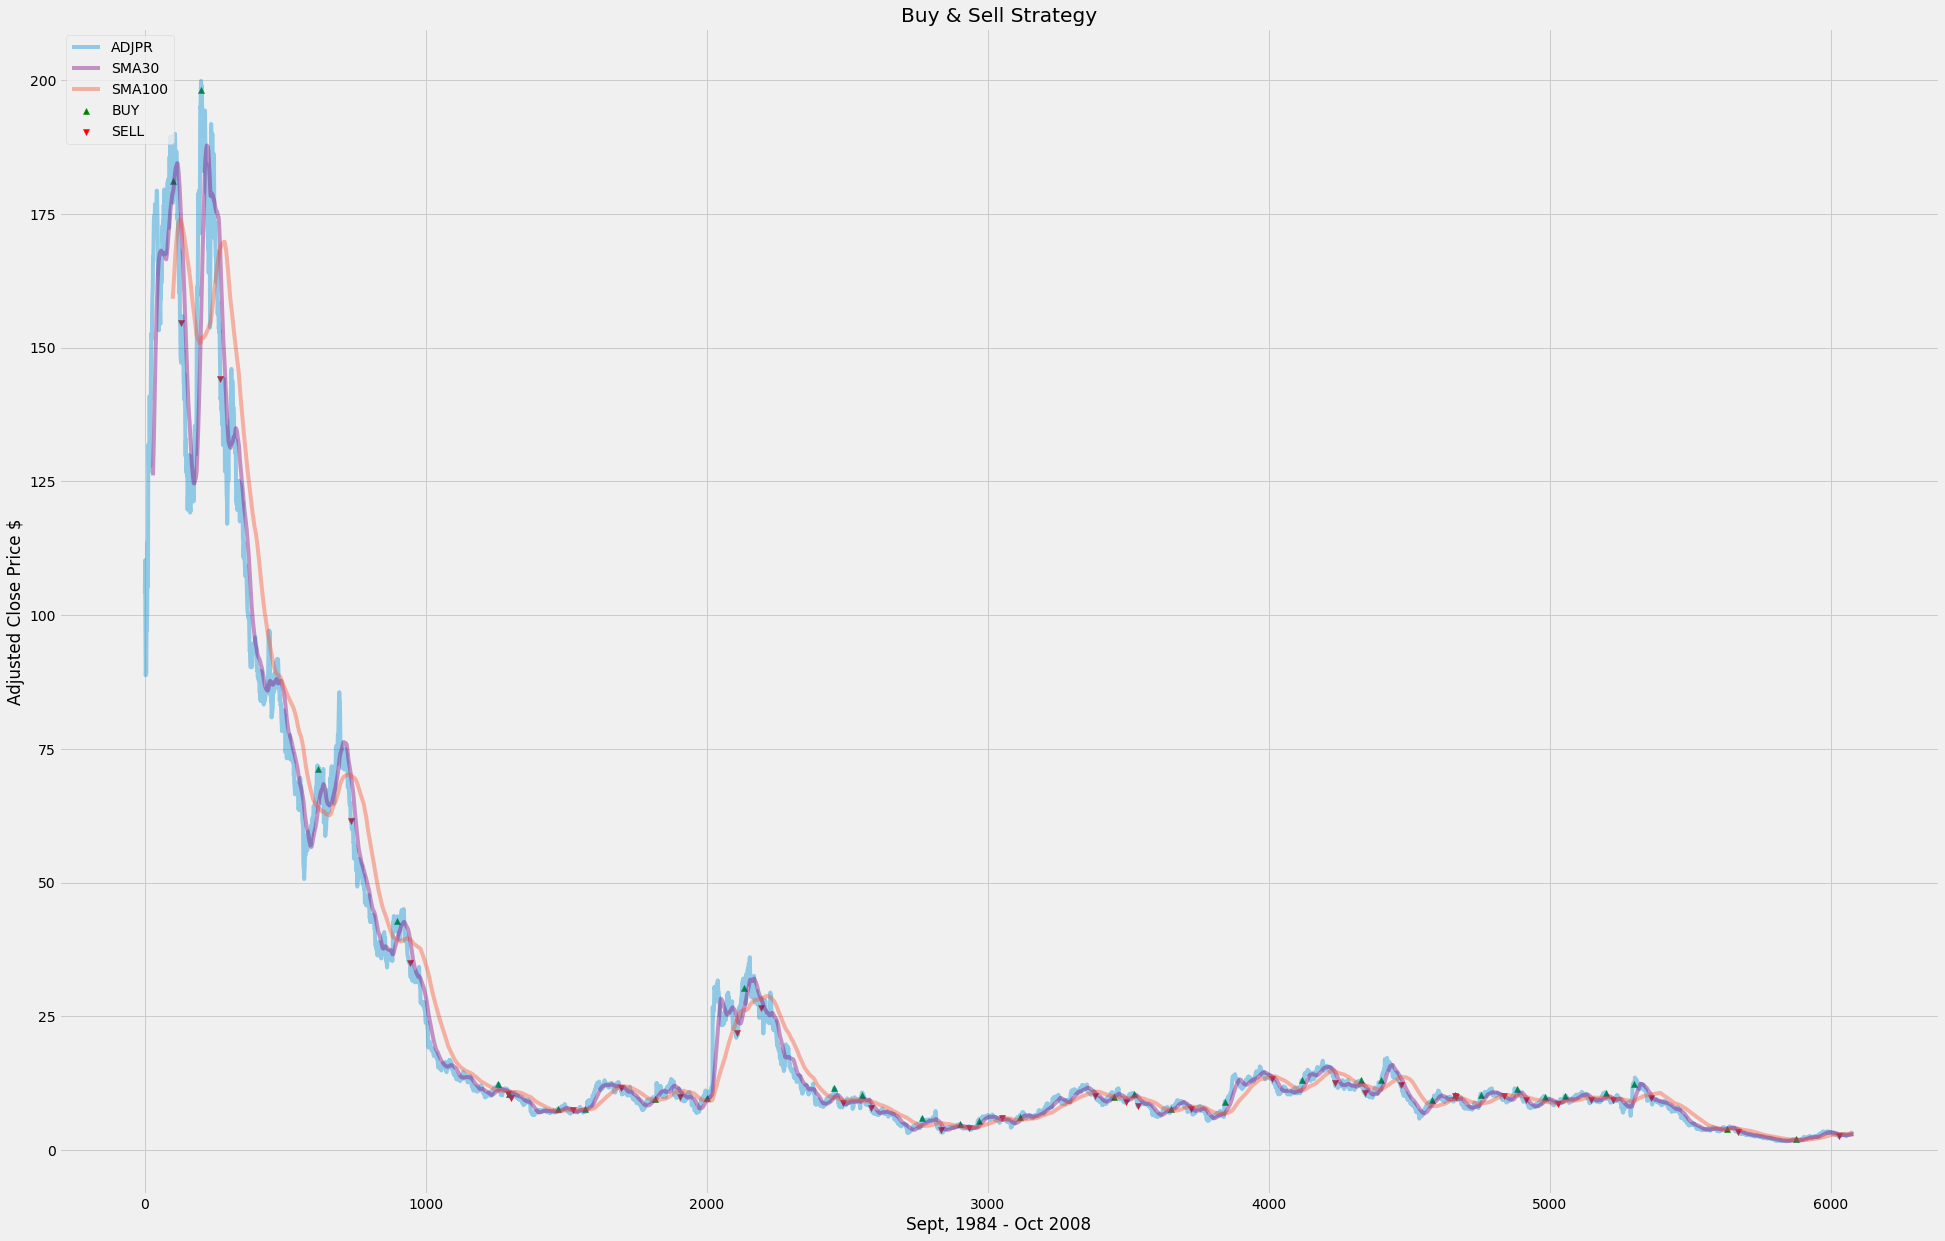

In [33]:
#Visualize the data and the strategy to buy & sell the stock

plt.figure(figsize=(30, 20))
plt.plot(df['ADJPR'], label = 'ADJPR', alpha =0.40)
plt.plot(df['SMA30'], label = 'SMA30', alpha =0.40, color ='purple')
plt.plot(df['SMA100'], label = 'SMA100', alpha =0.40)
plt.scatter(df.index, df['Buy_Price'], label = 'BUY', marker ='^', color = 'green')
plt.scatter(df.index, df['Sell_Price'], label = 'SELL', marker ='v', color = 'red')
plt.title('Buy & Sell Strategy')
plt.xlabel('Sept, 1984 - Oct 2008')
plt.ylabel('Adjusted Close Price $')
plt.legend(loc='upper left')
plt.show()

